# Importing Libraries

In [538]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [539]:
import warnings
warnings.filterwarnings('ignore')

In [540]:
from sklearn.metrics.pairwise import cosine_similarity

# Reading the dataset

* ## Books Dataset

In [541]:
books=pd.read_csv("/Users/asus/Downloads/project/Book-Recommender-System-main/Book-Recommender-System-main/book/Books.csv")
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [542]:
books.loc[0]

ISBN                                                          0195153448
Book-Title                                           Classical Mythology
Book-Author                                           Mark P. O. Morford
Year-Of-Publication                                                 2002
Publisher                                        Oxford University Press
Image-URL-S            http://images.amazon.com/images/P/0195153448.0...
Image-URL-M            http://images.amazon.com/images/P/0195153448.0...
Image-URL-L            http://images.amazon.com/images/P/0195153448.0...
Name: 0, dtype: object

In [543]:
books.shape

(271360, 8)

> _In books dataset, there are 271360 books with unique ISBN_

In [544]:
books.drop(['Image-URL-S','Image-URL-M'],axis=1, inplace=True)
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [545]:
books.columns=['ISBN', 'title', 'author', 'year_of_publication', 'publisher', 'image_url']

In [546]:
books.head()

,ISBN,title,author,year_of_publication,publisher,image_url
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [547]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   title                271360 non-null  object
 2   author               271358 non-null  object
 3   year_of_publication  271360 non-null  object
 4   publisher            271358 non-null  object
 5   image_url            271357 non-null  object
dtypes: object(6)
memory usage: 12.4+ MB


In [548]:
books.nunique()

ISBN                   271360
title                  242135
author                 102022
year_of_publication       202
publisher               16807
image_url              271041
dtype: int64

In [549]:
books.isnull().sum()

ISBN                   0
title                  0
author                 2
year_of_publication    0
publisher              2
image_url              3
dtype: int64

In [550]:
books.duplicated().sum()

0

* ## Users dataset

In [551]:
users=pd.read_csv("/Users/asus/Downloads/project/Book-Recommender-System-main/Book-Recommender-System-main/book/Users.csv")
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [552]:
users.shape

(278858, 3)

> _In users dataset, there are 278858 users_

In [553]:
users.columns=['user_id','location','age']
users.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [554]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   278858 non-null  int64  
 1   location  278858 non-null  object 
 2   age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [555]:
users.isnull().sum()

user_id          0
location         0
age         110762
dtype: int64

In [556]:
users.duplicated().sum()

0

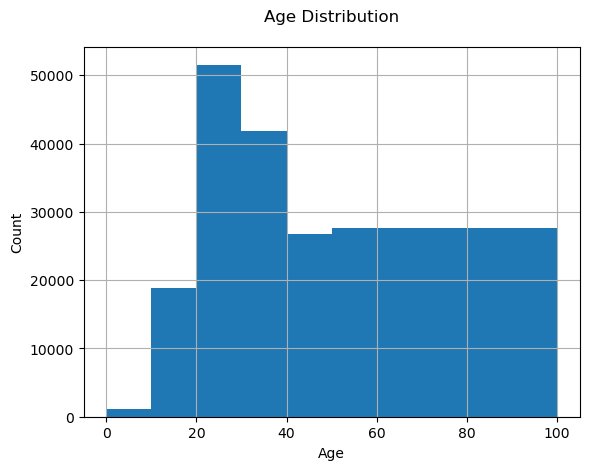

In [557]:
users.age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

* ## Ratings dataset

In [558]:
ratings=pd.read_csv("/Users/asus/Downloads/project/Book-Recommender-System-main/Book-Recommender-System-main/book/Ratings.csv")
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [559]:
ratings.shape

(1149780, 3)

> In ratings dataset, there are 1149780 ratings given to the books.

In [560]:
ratings.columns=['user_id','ISBN','book_rating']
ratings.head()

,user_id,ISBN,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [561]:
sorted(ratings.book_rating.unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [562]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   user_id      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   book_rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [563]:
ratings.isnull().sum()

user_id        0
ISBN           0
book_rating    0
dtype: int64

In [564]:
ratings.duplicated().sum()

0

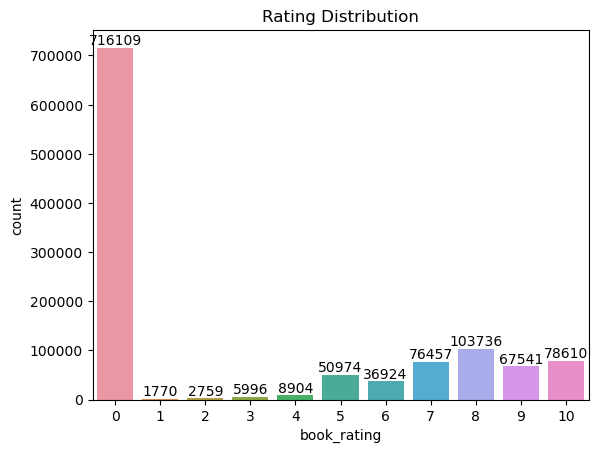

In [565]:
ax=sns.countplot(x=ratings['book_rating'])
for i in ax.containers:
    ax.bar_label(i)
plt.title('Rating Distribution')
plt.show()

In [566]:
ratings['user_id'].value_counts()

user_id
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: count, Length: 105283, dtype: int64

In [567]:
ratings['ISBN'].value_counts()

ISBN
0971880107     2502
0316666343     1295
0385504209      883
0060928336      732
0312195516      723
               ... 
1568656386        1
1568656408        1
1569551553        1
1570081808        1
05162443314       1
Name: count, Length: 340556, dtype: int64

# Merge the datasets

In [568]:
# users who had at least rated more than 150
count = ratings['book_rating'].value_counts()
ratings = ratings[ratings['book_rating'].isin(count[count >= 150].index)]

In [569]:
ratings

,user_id,ISBN,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [570]:
ratings_with_books = ratings.merge(books, on='ISBN')
ratings_with_books.head()

,user_id,ISBN,book_rating,title,author,year_of_publication,publisher,image_url
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...


In [571]:
count_rating=ratings_with_books.groupby('title').agg(mean_rating = ('book_rating', 'mean'), no_of_ratings = ('book_rating', 'count')).reset_index()
count_rating.head()

,title,mean_rating,no_of_ratings
0,A Light in the Storm: The Civil War Diary of ...,2.25,4
1,Always Have Popsicles,0.00,1
2,Apple Magic (The Collector's series),0.00,1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.00,1
4,Beyond IBM: Leadership Marketing and Finance ...,0.00,1


In [572]:
ratings_with_books.drop('book_rating', axis=1,inplace=True)

In [573]:
final_df=ratings_with_books.merge(count_rating, on='title')
final_df.head()

,user_id,ISBN,title,author,year_of_publication,publisher,image_url,mean_rating,no_of_ratings
0,276725,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,2.933333,60
1,276726,0155061224,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,1.714286,14
2,276727,0446520802,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,3.560000,650
3,276729,052165615X,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,3.000000,1
4,276729,0521795028,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,6.000000,1


In [574]:
# books which got at least 100 rating of user
final_df=final_df[final_df.no_of_ratings>=100]
final_df.head()

,user_id,ISBN,title,author,year_of_publication,publisher,image_url,mean_rating,no_of_ratings
2,276727,0446520802,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,3.560000,650
6,276744,038550120X,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,3.231504,838
7,276746,0425115801,Lightning,Dean R. Koontz,1996,Berkley Publishing Group,http://images.amazon.com/images/P/0425115801.0...,2.627737,274
8,276746,0449006522,Manhattan Hunt Club,JOHN SAUL,2002,Ballantine Books,http://images.amazon.com/images/P/0449006522.0...,3.504505,111
9,276746,0553561618,Dark Paradise,TAMI HOAG,1994,Bantam,http://images.amazon.com/images/P/0553561618.0...,2.154930,142


In [575]:
final_df.shape

(183799, 9)

In [576]:
final_df.title=[t.lower() for t in final_df.title]

In [577]:
final_df.drop_duplicates(['user_id','title'],inplace=True)

In [578]:
final_df.shape

(181459, 9)

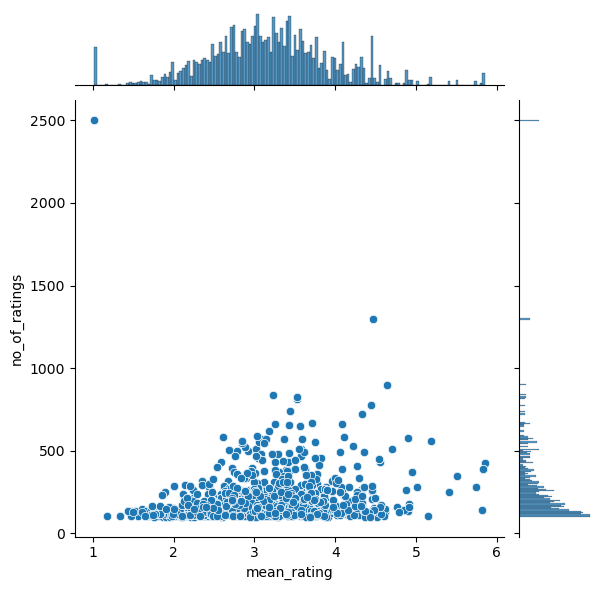

In [579]:
sns.jointplot(x='mean_rating', y='no_of_ratings', data=final_df)

# Creating the User-Item Interaction matrix

In [580]:
book_pivot = final_df.pivot_table(columns='user_id', index='title', values= 'mean_rating').fillna(0)

In [581]:
book_pivot

user_id,8,9,14,16,17,26,32,39,42,44,...,278819,278820,278824,278828,278832,278836,278843,278844,278846,278854
title,,,,,,,,,,,,,,,,,,,,,
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to die: a novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24 hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd chance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wuthering heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
year of wonders,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
you belong to me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Training Model

In [582]:
from scipy.sparse import csr_matrix

In [583]:
book_sparse = csr_matrix(book_pivot.values)
type(book_sparse)

scipy.sparse._csr.csr_matrix

In [584]:
book_sparse

<910x38132 sparse matrix of type '<class 'numpy.float64'>'
	with 181459 stored elements in Compressed Sparse Row format>

In [585]:
# Now import our clustering algoritm which is Nearest Neighbors this is an unsupervised ml algo
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm= 'brute', metric = 'cosine')

In [586]:
model.fit(book_sparse)

NearestNeighbors(algorithm='brute', metric='cosine')

In [587]:
query_index=111
book_pivot.iloc[query_index,:]

user_id
8         0.0
9         0.0
14        0.0
16        0.0
17        0.0
         ... 
278836    0.0
278843    0.0
278844    0.0
278846    0.0
278854    0.0
Name: bridget jones : the edge of reason, Length: 38132, dtype: float64

In [588]:
distance, suggestion_indices = model.kneighbors(book_pivot.iloc[query_index,:].values.reshape(1,-1), n_neighbors=11 )

In [589]:
distance

array([[0.        , 0.82705087, 0.85250805, 0.86185526, 0.86290277,
        0.86880782, 0.87608773, 0.87793734, 0.88192333, 0.88324638,
        0.88531067]])

In [590]:
suggestion_indices

array([[111, 112, 742, 530, 681,  35,  95, 367, 865, 149, 634]],
      dtype=int64)

In [591]:
suggestion_indices[0,1]

112

In [592]:
book_pivot.index[query_index]

'bridget jones : the edge of reason'

In [593]:
suggestion_indices.flatten()

array([111, 112, 742, 530, 681,  35,  95, 367, 865, 149, 634], dtype=int64)

In [594]:
i=0
for index in suggestion_indices.flatten():
    if i==0:
        print('Recommendations for {} :\n'.format(str(book_pivot.index[index]).title()))
    else:
        print('{}: {}'.format(i,str(book_pivot.index[index]).title()))
    i+=1

Recommendations for Bridget Jones : The Edge Of Reason :

1: Bridget Jones'S Diary
2: The Notebook
3: Shopaholic Ties The Knot
4: The Girls' Guide To Hunting And Fishing
5: A Walk To Remember
6: Black And Blue
7: Like Water For Chocolate: A Novel In Monthly Installments With Recipes, Romances And Home Remedies
8: Vinegar Hill (Oprah'S Book Club (Paperback))
9: Confessions Of A Shopaholic (Summer Display Opportunity)
10: The Color Purple


In [595]:
book_pivot.index[444]

'open season'

In [596]:
book_pivot.index

Index(['1984', '1st to die: a novel', '24 hours', '2nd chance', '4 blondes',
       '84 charing cross road', '\o\" is for outlaw"',
       'a beautiful mind: the life of mathematical genius and nobel laureate john nash',
       'a bend in the road', 'a case of need',
       ...
       'without remorse', 'wizard and glass (the dark tower, book 4)',
       'wld accordng garp', 'women who run with the wolves',
       'word freak: heartbreak, triumph, genius, and obsession in the world of competitive scrabble players',
       'wuthering heights', 'year of wonders', 'you belong to me',
       'zen and the art of motorcycle maintenance: an inquiry into values',
       'zoya'],
      dtype='object', name='title', length=910)

In [597]:
# storing all the book names
book_names = book_pivot.index

In [598]:
book_names[:10]

Index(['1984', '1st to die: a novel', '24 hours', '2nd chance', '4 blondes',
       '84 charing cross road', '\o\" is for outlaw"',
       'a beautiful mind: the life of mathematical genius and nobel laureate john nash',
       'a bend in the road', 'a case of need'],
      dtype='object', name='title')

In [599]:
np.where(book_pivot.index == 'Open Season'.lower())[0]

array([444], dtype=int64)

# Recommendations

In [600]:
def recommend_book_name(book_naam):
    query_index = np.where(book_pivot.index == book_naam.lower())[0][0]
    
    distance, suggestion_indices = model.kneighbors(book_pivot.iloc[query_index,:].values.reshape(1,-1), n_neighbors=11 )
    
    #print(suggestion_indices)
    #print(distance)
        
    i=0
    for index in suggestion_indices.flatten():
        if i==0:
            print('Recommendations for {} :\n'.format(str(book_pivot.index[index]).title()))
        else:
            print('{}: {}'.format(i,str(book_pivot.index[index]).title()))
        i+=1

In [601]:
recommend_book_name('Open Season')

Recommendations for Open Season :

1: Body Of Lies
2: Final Target
3: The Next Accident
4: Mercy
5: Faking It
6: The Face Of Deception
7: Welcome To Temptation
8: Hemlock Bay
9: Heartbreaker
10: Fast Women


# finding urls

In [602]:
final_df['title'].value_counts()

title
wild animus                    2502
the lovely bones: a novel      1295
the da vinci code               897
the nanny diaries: a novel      821
a painted house                 818
                               ... 
stardust                         97
the pull of the moon             96
drums of autumn                  96
island of the blue dolphins      95
the carousel                     93
Name: count, Length: 910, dtype: int64

In [603]:
ids = np.where(final_df['title'] == 'Open Season'.lower())[0][0]

In [604]:
final_df.iloc[ids]['image_url']

'http://images.amazon.com/images/P/0671027581.01.LZZZZZZZ.jpg'

In [605]:
book_name = []
for book_id in suggestion_indices:
    book_name.append(book_pivot.index[book_id])

In [606]:
book_name[0]

Index(['bridget jones : the edge of reason', 'bridget jones's diary',
       'the notebook', 'shopaholic ties the knot',
       'the girls' guide to hunting and fishing', 'a walk to remember',
       'black and blue',
       'like water for chocolate: a novel in monthly installments with recipes, romances and home remedies',
       'vinegar hill (oprah's book club (paperback))',
       'confessions of a shopaholic (summer display opportunity)',
       'the color purple'],
      dtype='object', name='title')

In [607]:
ids_index = []
for name in book_name[0]: 
    ids = np.where(final_df['title'] == name)[0][0]
    ids_index.append(ids)

In [608]:
for idx in ids_index:
    url = final_df.iloc[idx]['image_url']
    print(url)

http://images.amazon.com/images/P/0670892963.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0330332775.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0446520802.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0385336179.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0140292683.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0446608955.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0440226104.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0385474016.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0380730138.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0385335482.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0671617028.01.LZZZZZZZ.jpg


# Saving the model

In [609]:
import pickle

In [610]:
pickle.dump(model,open('/Users/asus/Downloads/project/Book-Recommender-System-main/Book-Recommender-System-main/book/model.pkl','wb'))
pickle.dump(book_names,open('/Users/asus/Downloads/project/Book-Recommender-System-main/Book-Recommender-System-main/book/book_names.pkl','wb'))
pickle.dump(final_df,open('/Users/asus/Downloads/project/Book-Recommender-System-main/Book-Recommender-System-main/book/final_df.pkl','wb'))
pickle.dump(book_pivot,open('/Users/asus/Downloads/project/Book-Recommender-System-main/Book-Recommender-System-main/book/book_pivot.pkl','wb'))